In [53]:
import pandas as pb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pip install plotly scipy

from scipy.stats import zscore
from scipy import stats

#dataset load 
df = pb.read_csv('data/total_netflix_2023 new.csv')

#first few rows of the dataset
print(df.head())


Note: you may need to restart the kernel to use updated packages.
                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

  Hours Viewed Number of Ratings Rating                            Genre  \
0    812100000            7696.0    6.0        Biography, Drama, History   
1    665100000            5216.0    5.7            Comedy, Drama,Romance   
2    622800000           11869.0    8.4                        ['Short']   
3    507700000           50077.0    7.4  ['Drama', 'History', 'Romance']   
4    503000000           45624.0    6.6            ['Comedy', 'Romance']   

                          


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
#column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB
None


In [56]:
#checking for missing values
print(df.isnull().sum())

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
Description            0
dtype: int64


## Data Cleaning and Exploration

1. Check for missing values in each column.
2. Verify data types and convert
3. Convert the 'Release Date' column, currently of object data type, into a datetime format.
4. Filter out non-finite values and convert 'Hours Viewed' to integer
    Filter out non-finite values and convert 'Number of Ratings' to float
    Filter out non-finite values and convert 'Rating' to float
5. Filter data set drop rows where certain columns have zeros (0), you can use the following code to drop rows where the "Hours Viewed," "Number of Ratings," or "Rating" columns have zeros
6. Explore the summary statistics for numeric columns.
7. Check for any anomalies or outliers.

In [57]:
df.columns
#shows the columns in the dataset

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

In [58]:
df.shape
#return the number of rows and columns in the dataset

(18332, 9)

df[columns_to_check] != '0'
This creates a boolean DataFrame, where True means the value is not '0' and False means the value is '0'.

.all(axis=1)
Ensures that all three columns in a row must have values not equal to '0' for the row to be kept.

df[...]
Filters the DataFrame to keep only rows that satisfy the condition.

In [59]:
#This creates a list of column names that need to be checked for zeros.
columns_to_check = ['Hours Viewed', 'Number of Ratings', 'Rating']

#filtering rows having zero values in the columns
df_filtered = df[(df[columns_to_check] !='0').all(axis=1)]
df_filtered

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."
...,...,...,...,...,...,...,...,...,...
14634,After Met You,No,2020-09-28,100000,157377.0,7.1,"['Action', 'Adventure', 'Crime']","war on drugs,substance abuse,discriminate just...","Armed with tools and engineering smarts, monke..."
14635,After My Death // 죄 많은 소녀,No,2020-04-24,100000,64.0,6.6,"['Animation', 'Adventure', 'Comedy']",musician,Organizers Clea Shearer and Joanna Teplin of T...
14636,After the Sunset,No,2018-08-10,100000,178295.0,7.1,"['Comedy', 'Drama', 'Sci-Fi']","drug abuse,narcotic abuse,overdose,prostitutio...",Baby central. A flock of storks is leaving wit...
14637,Afterlife (2021),No,2018-07-20,100000,68945.0,6.5,"['Comedy', 'Drama']","christmas,holiday season,sabotage,embarrassing...",A look at the 2001 Seattle Mariners who tied M...


In [60]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14639 entries, 0 to 14638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                14639 non-null  object
 1   Available Globally?  14639 non-null  object
 2   Release Date         14639 non-null  object
 3   Hours Viewed         14639 non-null  object
 4   Number of Ratings    14639 non-null  object
 5   Rating               14639 non-null  object
 6   Genre                14639 non-null  object
 7   Key Words            14639 non-null  object
 8   Description          14639 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [61]:
# Converting the 'Release Date' column, currently of object data type, into a datetime format.
pb.options.mode.chained_assignment = None
df_filtered['Release Date'] = pb.to_datetime(df_filtered['Release Date'], errors= 'coerce', format='%Y-%m-%d')

In [62]:
# Filtering out non-finite values and convert 'Hours Viewed' to integer data type.

df_filtered['Hours Viewed'] = pb.to_numeric(df_filtered['Hours Viewed'], errors= 'coerce')
df_filtered = df_filtered[df_filtered['Hours Viewed'].notna()] #filtering out NaN / non-finite values values
df_filtered =df_filtered[df_filtered['Hours Viewed'] !=0] #filtering out 0 values 
df_filtered['Hours Viewed'] = df_filtered['Hours Viewed'].astype(int)

In [63]:
#Filtering out non-finite values and convert 'Number of Ratings' to float

df_filtered['Number of Ratings'] = pb.to_numeric(df_filtered['Number of Ratings'], errors= 'coerce')
df_filtered[df_filtered['Number of Ratings'].notna()] #filtering out NaN / non-finite values values
df_filtered = df_filtered[df_filtered['Number of Ratings'] !=0] #filtering out 0 values
df_filtered['Number of Ratings'] = df_filtered['Number of Ratings'].astype(float)

In [64]:
#Filtering out non-finite values and convert 'Rating' to float
df_filtered['Rating'] = pb.to_numeric(df_filtered['Rating'], errors= 'coerce')
df_filtered[df_filtered['Rating'].notna()] #filtering out NaN / non-finite values values
df_filtered = df_filtered[df_filtered['Rating'] !=0] #filtering out 0 values
df_filtered['Rating'] = df_filtered['Rating'].astype(float)

In [65]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                14637 non-null  object        
 1   Available Globally?  14637 non-null  object        
 2   Release Date         14637 non-null  datetime64[ns]
 3   Hours Viewed         14637 non-null  int64         
 4   Number of Ratings    14633 non-null  float64       
 5   Rating               14633 non-null  float64       
 6   Genre                14637 non-null  object        
 7   Key Words            14637 non-null  object        
 8   Description          14637 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.1+ MB


## Descriptive Statistics

- Computing summary statistics for numeric columns using describe() to get an overview of the distribution, mean, median, and spread of the data.
- Creating box plots for numeric columns to visually identify outliers.

In [66]:
numeric_summary = df_filtered.describe()
print(numeric_summary)

                        Release Date  Hours Viewed  Number of Ratings  \
count                          14637  1.463700e+04       1.463300e+04   
mean   2020-05-10 11:30:37.999590144  1.098065e+07       2.166324e+04   
min              2010-04-01 00:00:00  1.000000e+05       5.000000e+00   
25%              2018-11-30 00:00:00  8.000000e+05       3.080000e+02   
50%              2020-08-04 00:00:00  2.900000e+06       2.364000e+03   
75%              2022-02-08 00:00:00  8.800000e+06       1.168800e+04   
max              2023-06-30 00:00:00  8.121000e+08       1.937639e+06   
std                              NaN  3.235293e+07       8.619837e+04   

             Rating  
count  14633.000000  
mean       6.623775  
min        1.400000  
25%        5.800000  
50%        6.600000  
75%        7.400000  
max       10.000000  
std        1.256376  


In [67]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


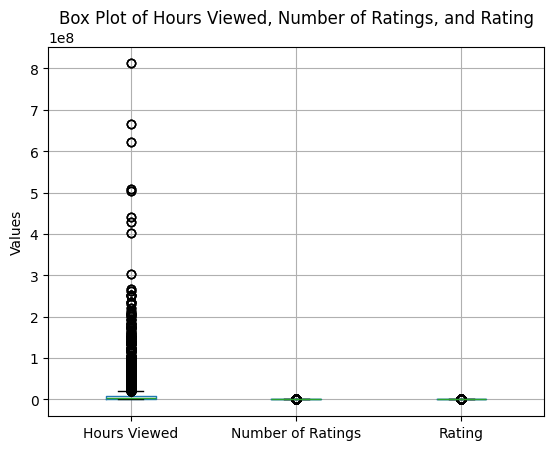

In [68]:
# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a box plot for each column
df_filtered[['Hours Viewed', 'Number of Ratings', 'Rating']].boxplot(ax=ax)

# Set the title and labels
ax.set_title('Box Plot of Hours Viewed, Number of Ratings, and Rating')
ax.set_ylabel('Values')

# Display the plot
plt.show()

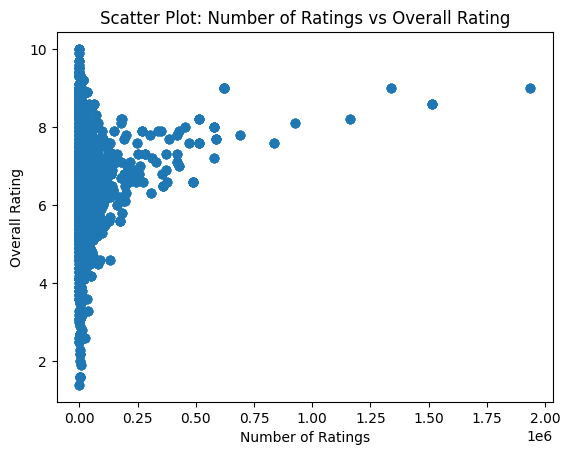

In [69]:

# Creating a figure and axis
fig, ax = plt.subplots()

# Creating a scatter plot
ax.scatter(df_filtered['Number of Ratings'], df_filtered['Rating'])

# Set the title and labels
ax.set_title('Scatter Plot: Number of Ratings vs Overall Rating')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Overall Rating')

# Showing the plot
plt.show()

In [70]:
numeric_columns =['Hours Viewed', 'Number of Ratings', 'Rating']
df_zscore = df_filtered[numeric_columns].apply(zscore)
Q1 = df_filtered[numeric_columns].quantile(0.25)
Q3 = df_filtered[numeric_columns].quantile(0.75)
IQR = Q3-Q1

#iDENTIFYING ROWS OUTSIDE THE IQR
outliers_iqr = df_filtered[((df_filtered[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_iqr

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."
...,...,...,...,...,...,...,...,...,...
14628,Affliction // Pulang,No,2021-01-01,100000,179564.0,6.7,"['Crime', 'Drama']","children,maternity,human soul,soul transmigrat...","The party keeps on going for Poppy, Branch and..."
14631,Afrikou na pionyru // Afrika na Pionieri,No,2020-05-08,100000,63376.0,8.6,"['Action', 'Adventure', 'Drama']","pubic hair,nudity,sex scene,voyeur,voyeurism",Animated misadventures of a hard-partying lemu...
14634,After Met You,No,2020-09-28,100000,157377.0,7.1,"['Action', 'Adventure', 'Crime']","war on drugs,substance abuse,discriminate just...","Armed with tools and engineering smarts, monke..."
14636,After the Sunset,No,2018-08-10,100000,178295.0,7.1,"['Comedy', 'Drama', 'Sci-Fi']","drug abuse,narcotic abuse,overdose,prostitutio...",Baby central. A flock of storks is leaving wit...


## Exploratory Data Analysis (EDA)

- Exploring the distribution of "Hours Viewed," "Number of Ratings," and "Rating" using histograms and box plots.
- Analyzing the distribution of genres to understand the popularity of different genres.
- Checking for correlations between numerical variables.

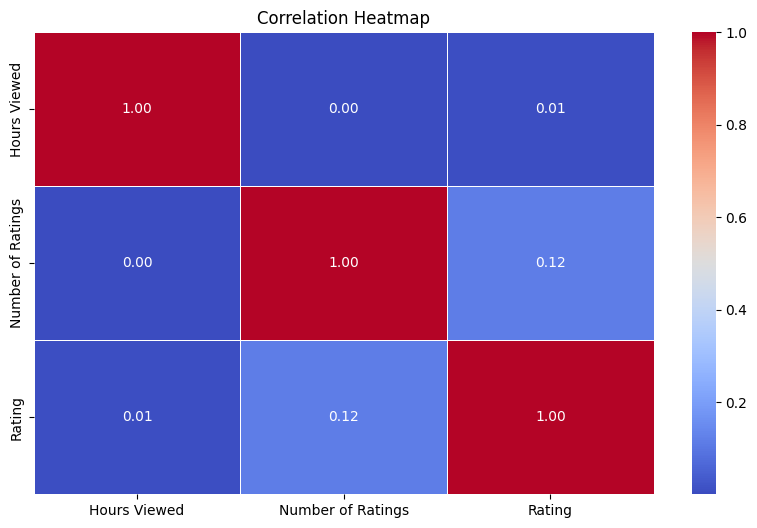

In [71]:
#Correlation Matrix
correlation_matrix = df_filtered[['Hours Viewed', 'Number of Ratings', 'Rating']].corr()

#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Time Analysis 

- Analyze the distribution of releases over time.
- Check if there is any seasonality in the release dates.

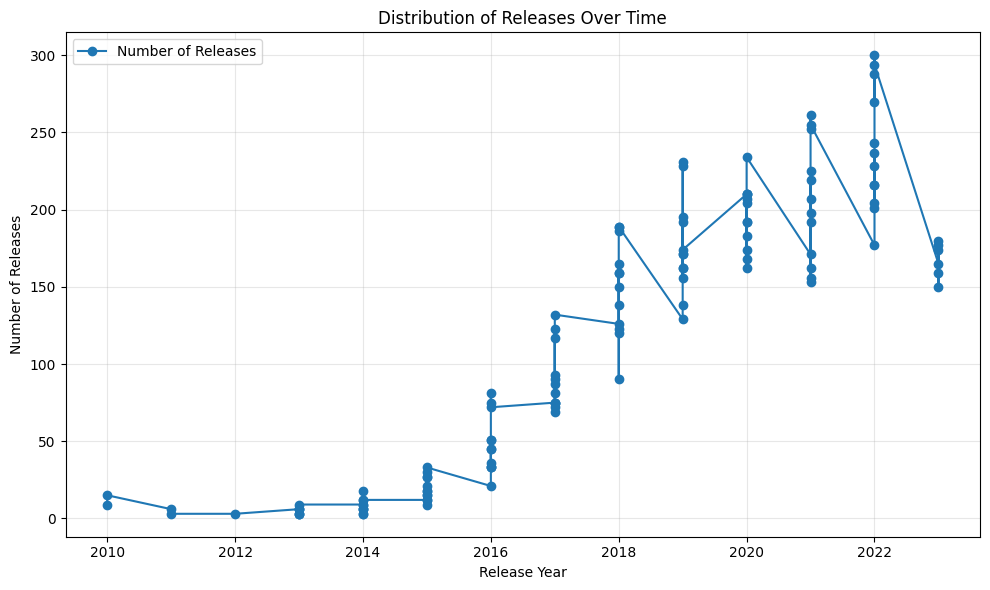

In [72]:
#Extracting year and month from the 'Release Date' column
df_filtered['Release Year'] = df_filtered['Release Date'].dt.year
df_filtered['Release Month'] = df_filtered['Release Date'].dt.month

#Counting releases per month 
release_counts =df_filtered.groupby(['Release Year', 'Release Month']).size().reset_index(name='Count')

#Plotting the number of releases over time using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(release_counts['Release Year'], release_counts['Count'], marker='o', label='Number of Releases')
plt.title('Distribution of Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Top Performers 
- Identifying top-rated shows based on ratings and hours viewed. 
- Checking if there is a correlation between the number of ratings and overall rating.

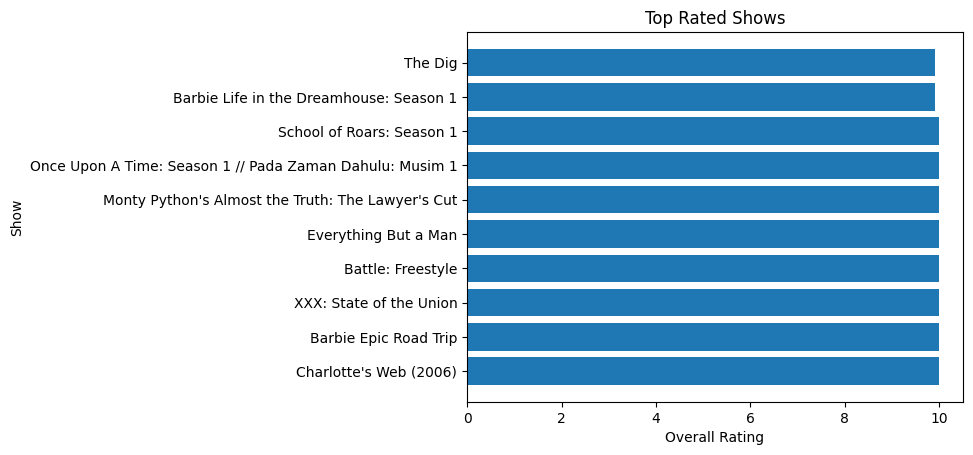

In [75]:

# Identifying top-rated shows based on ratings 
top_rated_shows = df_filtered.nlargest(10, 'Rating')[['Title', 'Rating']]


#For top rated shows
# Create a figure and axis
fig, ax = plt.subplots()

# Create a horizontal bar plot
ax.barh(top_rated_shows['Title'], top_rated_shows['Rating'])

# Set the title and labels
ax.set_title('Top Rated Shows')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Show')

# Show the plot
plt.show()

## Conclusion
- The analysis explored various aspects of Netflix Shows, focusing specifically on the Ratings and Viewership metrics. 
- Identified top rated shows and most viewed shows, providing insights into the context that resonates most with audiences.
- Examined the correlation between the number of ratings and overall ratings, revealing patterns in viewer engagement and satisfaction. 
- The visualizations, including scatter plots and bar charts, helped in effectively communicating these findings. 
- Overall, this study provides information for understanding viewer preferences and can guide future content strategies for Netflix.